In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings("ignore")

In [8]:
js=pd.read_csv(R"C:\Users\ny691\Downloads\DATASETS\DATASETS\Outlier Detection Dataset\Outlier Detection Dataset\jobselection.csv")

In [9]:
js

,score,exam_marks,seleted
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [10]:
js.columns=["Score","Exam","Select"]

In [11]:
js

,Score,Exam,Select
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


<AxesSubplot:>

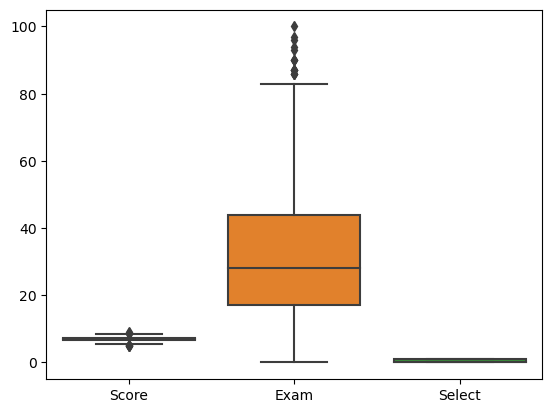

In [13]:
sns.boxplot(data=js)

(array([  5.,  20.,  64., 181., 259., 247., 150.,  59.,  13.,   2.]),
 array([4.89 , 5.313, 5.736, 6.159, 6.582, 7.005, 7.428, 7.851, 8.274,
        8.697, 9.12 ]),
 <BarContainer object of 10 artists>)

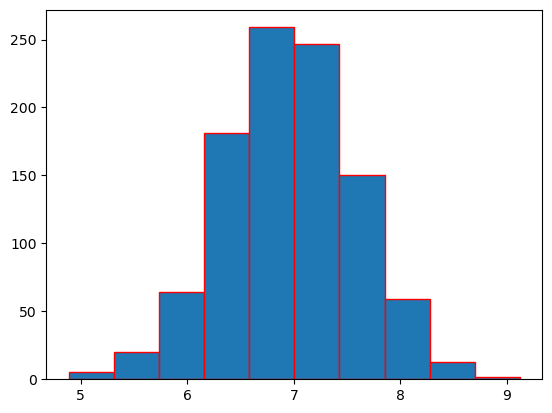

In [16]:
plt.hist(js["Score"],ec="r")

<AxesSubplot:xlabel='Score'>

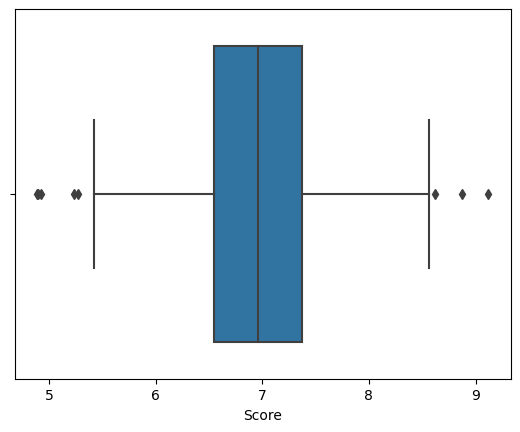

In [17]:
sns.boxplot(js["Score"])

<AxesSubplot:xlabel='Score', ylabel='Density'>

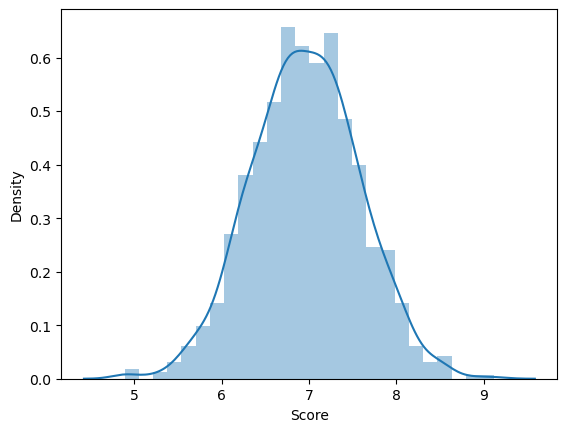

In [18]:
sns.distplot(js["Score"])

In [19]:
js["Score"].skew()

-0.014529938929314918

In [20]:
np.round(js["Score"].skew())

-0.0

### mean std-method

In [21]:
js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Score   1000 non-null   float64
 1   Exam    1000 non-null   int64  
 2   Select  1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [22]:
js["Score"].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: Score, dtype: float64

#### Parcentile -method

### lower-->3%,upper-->97%

In [23]:
js["Score"].quantile(0.03)

5.7797

In [24]:
l1=js["Score"].quantile(0.03)

In [25]:
l1

5.7797

In [26]:
js["Score"].quantile(0.97)

8.110299999999999

In [27]:
u1=js["Score"].quantile(0.97)

In [28]:
u1

8.110299999999999

In [29]:
js["Score"]<l1

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999     True
Name: Score, Length: 1000, dtype: bool

In [30]:
js[js["Score"]<l1]

,Score,Exam,Select
13,5.68,26,0
84,5.65,35,1
137,5.69,53,0
158,5.74,50,0
200,5.77,22,0
216,5.42,36,1
219,5.48,3,0
257,5.74,76,0
260,5.66,57,1
278,5.23,17,1


In [31]:
js["Score"]>u1

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997    False
998     True
999    False
Name: Score, Length: 1000, dtype: bool

In [32]:
js[js["Score"]>u1]

,Score,Exam,Select
34,8.15,9,0
37,8.51,9,1
49,8.23,28,1
54,8.42,36,1
55,8.12,15,0
76,8.35,12,0
78,8.20,12,0
98,8.12,76,0
131,8.19,19,1
150,8.53,22,0


In [33]:
js[(js["Score"]<l1) | (js["Score"]>u1)]

,Score,Exam,Select
13,5.68,26,0
34,8.15,9,0
37,8.51,9,1
49,8.23,28,1
54,8.42,36,1
55,8.12,15,0
76,8.35,12,0
78,8.20,12,0
84,5.65,35,1
98,8.12,76,0


In [34]:
js[(js["Score"]<l1) | (js["Score"]>u1)].count()

Score     60
Exam      60
Select    60
dtype: int64

In [35]:
js[(js["Score"]>=l1) & (js["Score"]<=u1)]

,Score,Exam,Select
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
990,6.17,33,1
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1


In [42]:
js1=js[(js["Score"]>=l1) & (js["Score"]<=u1)]

In [43]:
js1

,Score,Exam,Select
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
990,6.17,33,1
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1


In [44]:
js2=pd.read_csv(R"C:\Users\ny691\Downloads\DATASETS\DATASETS\Outlier Detection Dataset\Outlier Detection Dataset\jobselection.csv")

In [45]:
js2

,score,exam_marks,seleted
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [46]:
js2.columns=["Score","Exam","Select"]

In [47]:
js2

,Score,Exam,Select
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


### lower----> 5%
### upper---->95%

In [56]:
js2["Score"].quantile(0.05)

5.97

In [57]:
l2=js2["Score"].quantile(0.05)

In [51]:
l2

5.97

In [58]:
u2=js2["Score"].quantile(0.95)

In [54]:
u2

7.9505

In [59]:
js2["Score"]<l2

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997     True
998    False
999     True
Name: Score, Length: 1000, dtype: bool

In [60]:
js2["Score"]>u2

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997    False
998     True
999    False
Name: Score, Length: 1000, dtype: bool

In [61]:
js2[(js2["Score"]<l2) | (js2["Score"]>u2)]

,Score,Exam,Select
13,5.68,26,0
32,5.91,11,1
34,8.15,9,0
37,8.51,9,1
49,8.23,28,1
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [62]:
js2[(js2["Score"]<l2) | (js2["Score"]>u2)].count()

Score     99
Exam      99
Select    99
dtype: int64

In [65]:
js2[(js2["Score"]>=l2) & (js2["Score"]<=u2)]

,Score,Exam,Select
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
990,6.17,33,1
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1


In [66]:
js2[(js2["Score"]>=l2) & (js2["Score"]<=u2)]

,Score,Exam,Select
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
990,6.17,33,1
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1


In [67]:
js2["Score"].map(lambda A : l2 if A<l2 else u2 if A>u2 else A)

0      7.1900
1      7.4600
2      7.5400
3      6.4200
4      7.2300
        ...  
995    7.9505
996    7.9505
997    5.9700
998    7.9505
999    5.9700
Name: Score, Length: 1000, dtype: float64

In [68]:
js2["Score"]=js2["Score"].map(lambda A : l2 if A<l2 else u2 if A>u2 else A)

In [69]:
js2

,Score,Exam,Select
0,7.1900,26,1
1,7.4600,38,1
2,7.5400,40,1
3,6.4200,8,1
4,7.2300,17,0
...,...,...,...
995,7.9505,44,1
996,7.9505,65,1
997,5.9700,34,0
998,7.9505,46,1


In [71]:
js2[js2["Score"]<l2]

,Score,Exam,Select


In [72]:
js2[js2["Score"]>u2]

,Score,Exam,Select


In [73]:
js1

,Score,Exam,Select
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
990,6.17,33,1
991,7.04,57,0
992,6.26,12,0
993,6.73,21,1


In [74]:
from scipy.stats.mstats import winsorize

In [75]:
ary1=np.arange(1,100)

In [76]:
ary1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [77]:
winsorize(ary1,(0.05,0.05))

masked_array(data=[ 5,  5,  5,  5,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                   15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
                   29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
                   43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
                   57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
                   71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
                   85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 95, 95, 95,
                   95],
             mask=False,
       fill_value=999999)